In [862]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt


In [863]:
data = pd.read_csv('DLNS-ALL.csv')

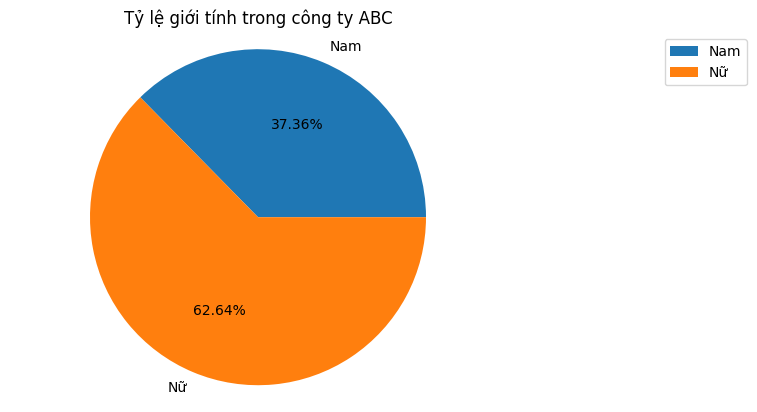

In [864]:
# phân tích tỷ lệ giới tính toàn công ty
# khởi tạo dữ liệu phục vụ cho việc liệt kê
sex_names = np.array(['Nam','Nữ'])
sex_counts = np.array([0,0])
# lọc danh sách 
emp_data = data.loc[1:, ['Status','Giới tính']]
item_count = emp_data.shape[0]
for index in range(0, item_count):
    status = emp_data.iloc[index]['Status']
    if status != 'Normal':
        continue
    IsMale = emp_data.iloc[index]['Giới tính'] == 'M'
    if IsMale :
        sex_counts[0] += 1
    else:
        sex_counts[1] += 1

plt.title('Tỷ lệ giới tính trong công ty ABC')
plt.pie(sex_counts, labels= sex_names, startangle= 0, autopct='%1.2f%%')
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



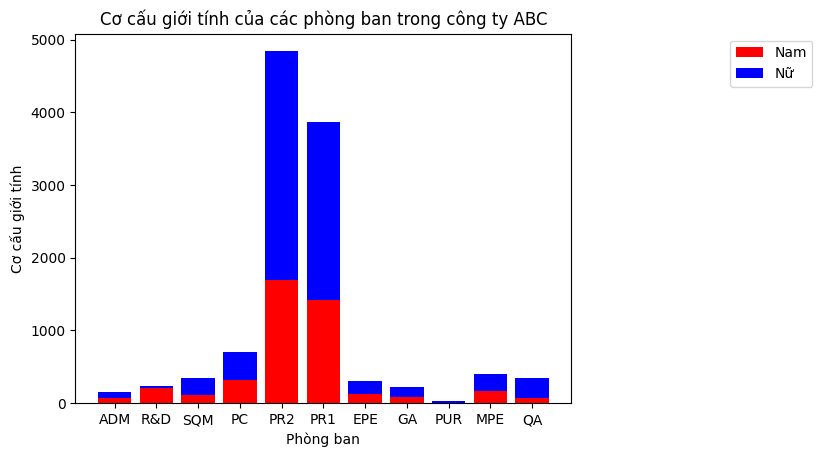

[  74.  212.  111.  324. 1695. 1416.  120.   92.    4.  169.   67.] [  85.   25.  235.  376. 3144. 2450.  185.  137.   30.  232.  284.]


In [865]:
# phân tích tỷ lệ giới tính từng phòng ban
# lấy cột dữ liệu phòng ban và liệt kê các phòng ban
departments_df = data.loc[1:, ['Department Name']]
department_names = []
for index in range(0, departments_df.shape[0]):
    name = departments_df.iloc[index]['Department Name']
    if name not in department_names:
        department_names.append(name)
departments_cnt = len(department_names)
male_counts = np.empty(departments_cnt)
female_counts = np.empty(departments_cnt)
male_counts.fill(0)
female_counts.fill(0)


# chọn dữ liệu và lọc danh sách 
employee_df = data.loc[1:, ['Department Name','Status','Giới tính']]
item_count = employee_df.shape[0]
for index in range(0, item_count):
    status = employee_df.iloc[index]['Status']
    if status != 'Normal':
        continue
    IsMale = employee_df.iloc[index]['Giới tính'] == 'M'
    department_name = employee_df.iloc[index]['Department Name']
    department_idx = department_names.index(department_name)
    if IsMale :
        male_counts[department_idx] += 1
    else:
        female_counts[department_idx] += 1

# vẽ đồ thị
columns = np.arange(len(department_names))
plt.bar(columns, male_counts, label='Nam', color='red')
plt.bar(columns, female_counts, label='Nữ', color='blue', bottom=male_counts)

plt.title('Cơ cấu giới tính của các phòng ban trong công ty ABC')
plt.xlabel('Phòng ban')
plt.ylabel('Cơ cấu giới tính')
plt.legend(loc='best',bbox_to_anchor=(1, 0, 0.5, 1),labels=['Nam','Nữ'])
plt.xticks(columns, department_names)
plt.show()
print(male_counts, female_counts)

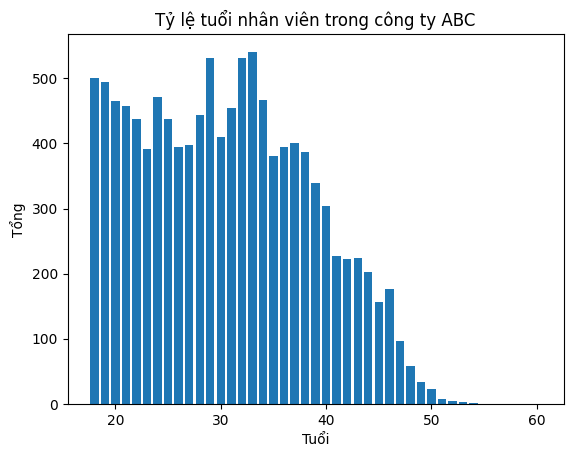

In [866]:
# phân tích tỷ lệ tuổi
age_start = 18
age_end = 60
age_titles = np.arange(start= age_start, stop = age_end + 1, step= 1)
age_counts = np.empty(age_titles.shape[0])
age_counts.fill(0)

# lọc danh sách 
employee_df = data.loc[1:, ['Status','Tuổi']]
for index in range(0, emp_data.shape[0]):
    status = emp_data.iloc[index]['Status']
    if status != 'Normal':
        continue
    age = employee_df.iloc[index]['Tuổi']
    if(age < age_start) or (age > age_end):
        continue
    age_index = int(age - age_start)
    age_counts[age_index] += 1


plt.title('Tỷ lệ tuổi nhân viên trong công ty ABC')
plt.xlabel('Tuổi')
plt.ylabel('Tổng')
plt.bar(age_titles, age_counts)
plt.show()


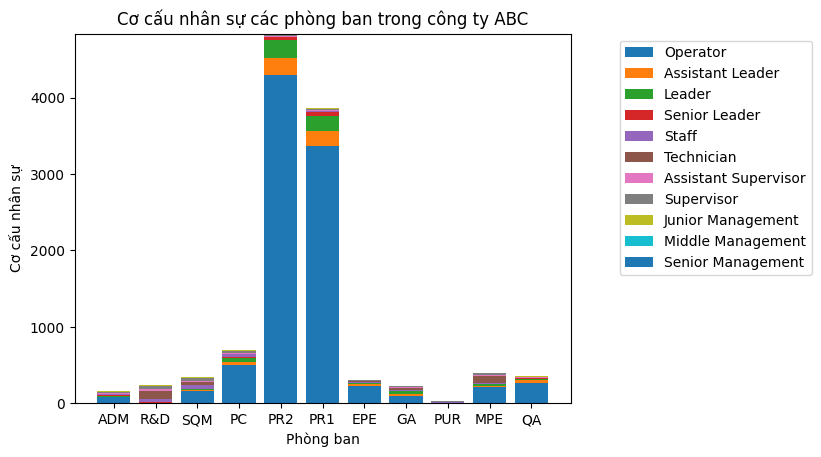

In [867]:
# phân tích cơ cấu nhân sự
# lấy cột dữ liệu phòng ban và liệt kê các phòng ban
departments_df = data.loc[1:, ['Department Name']]
department_names = []
for index in range(0, departments_df.shape[0]):
    name = departments_df.iloc[index]['Department Name']
    if name not in department_names:
        department_names.append(name)
departments_cnt = len(department_names)

# chuẩn bị dữ liệu cho phân tích
pos_names = ['Operator','Assistant Leader','Leader','Senior Leader','Staff','Technician','Assistant Supervisor','Supervisor','Junior Management','Middle Management', 'Senior Management']
pos_cnt = len(pos_names)
counters = []
for pos_name in pos_names:
    row_data = np.empty(departments_cnt)
    row_data.fill(0)
    counters.append(row_data)

# lấy các cột phòng ban, trạng thái, vị trí
# sau đó phân tích dữ liệu thống kê
employee_df = data.loc[1:, ['Department Name','Status','Position Type']]
item_count = employee_df.shape[0]
xxx = 0
for index in range(0, item_count):
    status = employee_df.iloc[index]['Status']
    if status != 'Normal':
        continue
    department_name = employee_df.iloc[index]['Department Name']
    pos_name = employee_df.iloc[index]['Position Type']
    department_idx = department_names.index(department_name)
    pos_idx = pos_names.index(pos_name)
    counters[pos_idx][department_idx] += 1


# vẽ đồ thị
columns = np.arange(len(department_names))
bottom = counters[0]
counter_cnt = len(counters)
for index  in range(0, counter_cnt):
    if index == 0:
        plt.bar(columns, counters[index], label=pos_names[index])
        bottom = counters[index]
    else:
        plt.bar(columns, counters[index], label=pos_names[index], bottom=bottom)
        bottom = bottom + counters[index]

plt.title('Cơ cấu nhân sự các phòng ban trong công ty ABC')
plt.xlabel('Phòng ban')
plt.ylabel('Cơ cấu nhân sự')
plt.legend(loc='best',bbox_to_anchor=(1, 0, 0.5, 1), labels = pos_names)
plt.xticks(columns, department_names)
plt.show()


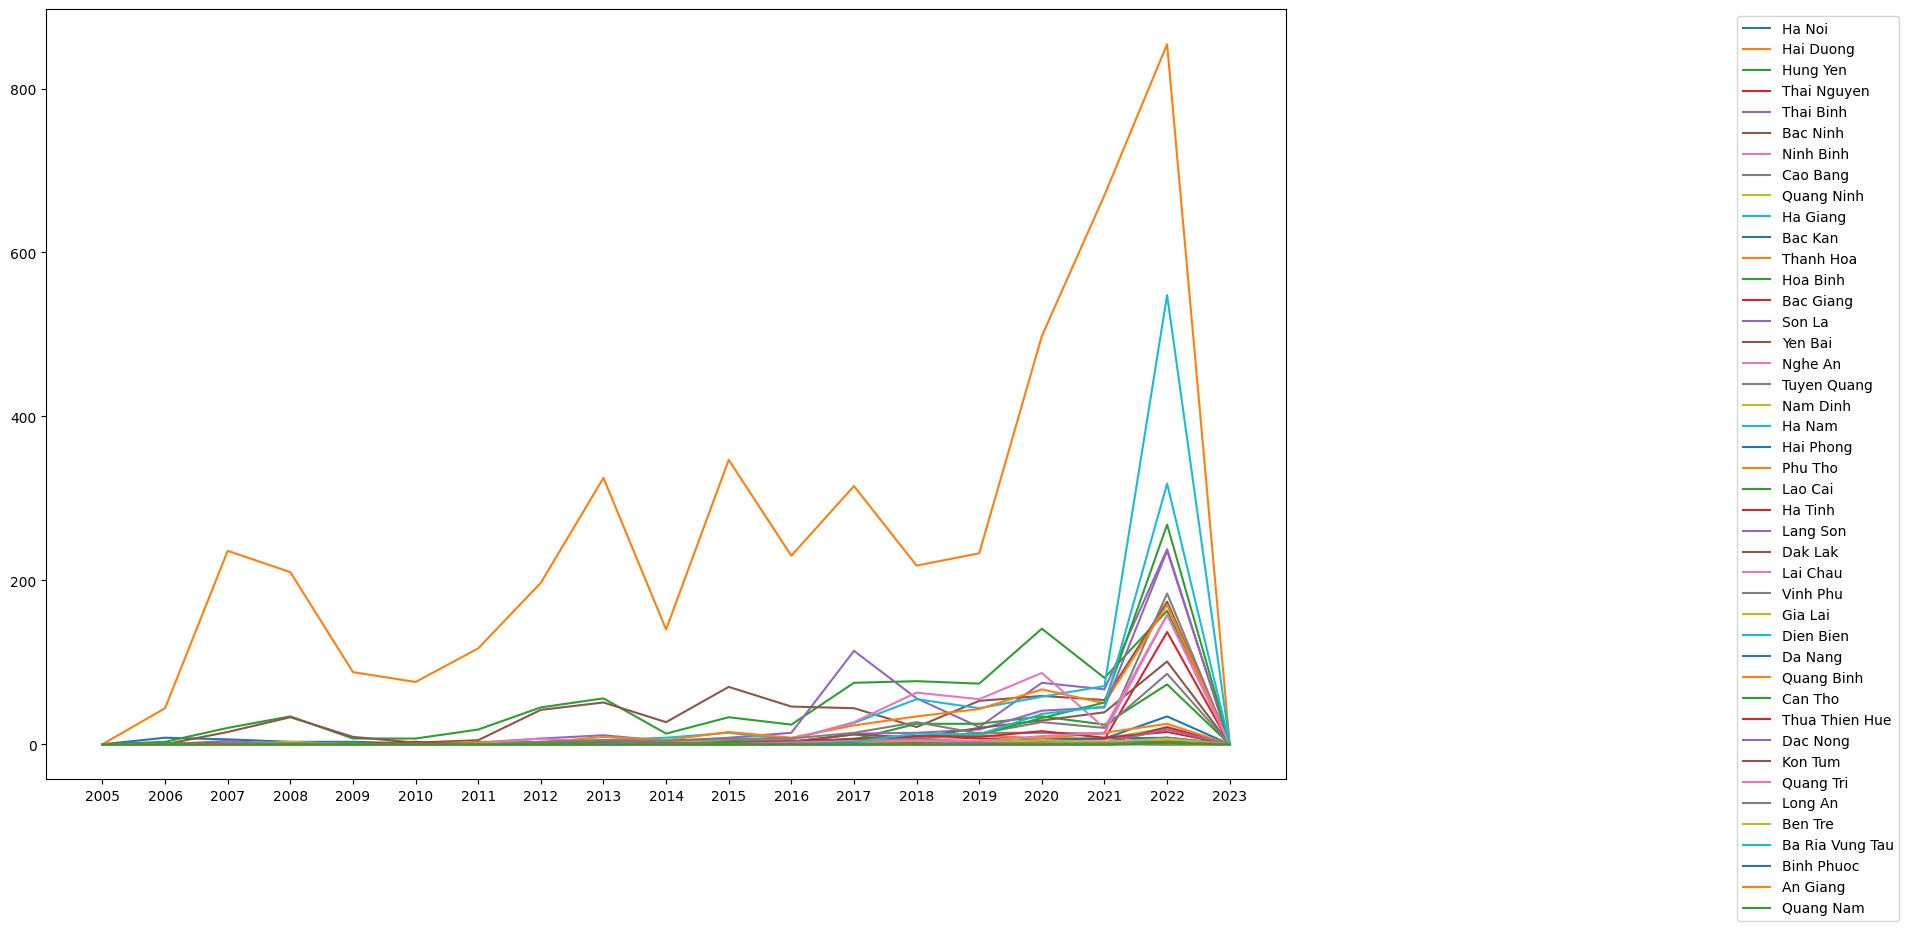

In [868]:
# phân tích số lượng nhân sự tuyển dụng qua các năm ở từng địa phương
# lấy cột địa phương
province_df = data.loc[1:, ['Tỉnh']]
provinces = []
for index in range(0, province_df.shape[0]):
    province = province_df.iloc[index]['Tỉnh']
    if province not in provinces:
        provinces.append(province)

years = []
for year in range(2005,2024):
    years.append(int(year))

counters = []
for province in provinces:
    counter = np.empty(len(years))
    counter.fill(0)
    counters.append(counter)

# lấy dữ liệu cần thiết
employee_df = data.loc[1:, ['Join date','Tỉnh']]
for index in range(0, employee_df.shape[0]):
    province = data.iloc[index]['Tỉnh']
    province_idx = provinces.index(province)
    joindate = data.iloc[index]['Join date']
    year = int(joindate[-4:])
    year_idx = years.index(year)
    counters[province_idx][year_idx] += 1


plt.figure(figsize=(16,10))
plt.xticks(years)

for index in range(0, len(counters)):
    plt.plot(years, counters[index], label = provinces[index])

plt.xticks(years)
plt.legend(loc='best',bbox_to_anchor=(1, 0, 0.5, 1), labels = provinces)
plt.show()



[4798.  871.   59.  839.  705.  621.  429. 3389.]


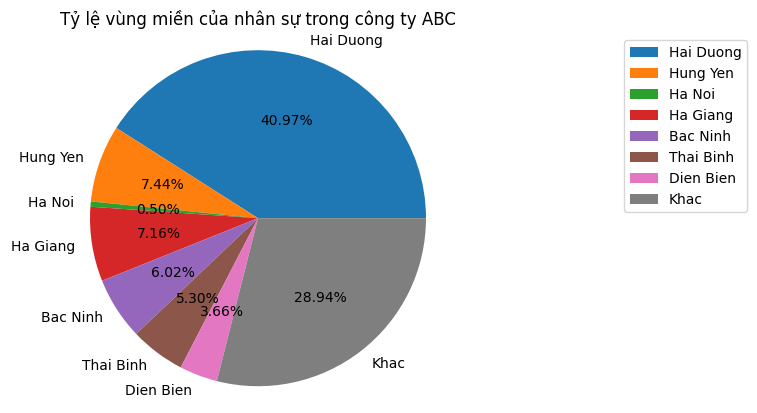

In [869]:
# phân tích số lượng nhân sự tuyển dụng qua các năm ở từng địa phương
provinces = ['Hai Duong','Hung Yen','Ha Noi','Ha Giang','Bac Ninh','Thai Binh','Dien Bien','Khac']
counters = np.empty(len(provinces))
counters.fill(0)

# lấy dữ liệu cần thiết
employee_df = data.loc[1:, ['Tỉnh']]
for index in range(0, employee_df.shape[0]):
    province = data.iloc[index]['Tỉnh']
    if province in provinces:
        counter_idx = provinces.index(province)
        counters[counter_idx] += 1
    else:
        counter_idx = provinces.index('Khac')
        counters[counter_idx] += 1

print(counters)
plt.title('Tỷ lệ vùng miền của nhân sự trong công ty ABC')
plt.pie(counters, labels= provinces, startangle= 0, autopct='%1.2f%%')
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


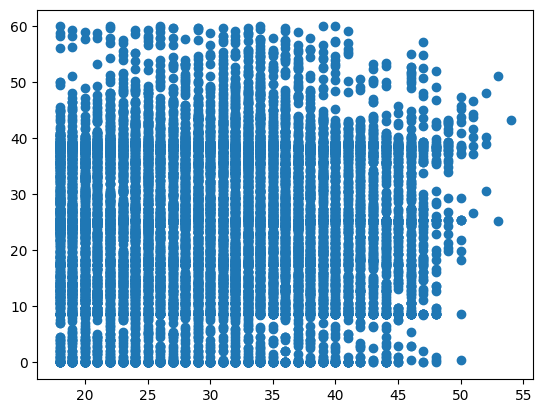

[44.0, 39.0, 38.0, 38.0, 38.0, 37.0, 38.0, 37.0, 37.0, 37.0, 39.0, 38.0, 39.0, 35.0, 34.0, 35.0, 34.0, 37.0, 40.0, 34.0, 37.0, 34.0, 35.0, 34.0, 37.0, 34.0, 34.0, 34.0, 34.0, 36.0, 38.0, 40.0, 36.0, 40.0, 34.0, 35.0, 38.0, 37.0, 34.0, 36.0, 34.0, 35.0, 36.0, 38.0, 35.0, 37.0, 34.0, 39.0, 34.0, 35.0, 36.0, 38.0, 36.0, 34.0, 34.0, 34.0, 37.0, 38.0, 38.0, 37.0, 38.0, 40.0, 37.0, 36.0, 37.0, 38.0, 35.0, 34.0, 34.0, 36.0, 39.0, 39.0, 37.0, 38.0, 34.0, 38.0, 37.0, 38.0, 34.0, 37.0, 36.0, 39.0, 39.0, 37.0, 38.0, 35.0, 35.0, 35.0, 38.0, 39.0, 35.0, 38.0, 35.0, 35.0, 33.0, 38.0, 34.0, 39.0, 36.0, 36.0, 34.0, 34.0, 36.0, 34.0, 36.0, 38.0, 34.0, 36.0, 38.0, 37.0, 36.0, 37.0, 33.0, 35.0, 36.0, 34.0, 37.0, 37.0, 34.0, 38.0, 36.0, 35.0, 34.0, 38.0, 34.0, 36.0, 37.0, 35.0, 34.0, 34.0, 34.0, 34.0, 37.0, 34.0, 34.0, 33.0, 35.0, 35.0, 37.0, 39.0, 34.0, 35.0, 34.0, 33.0, 34.0, 34.0, 38.0, 36.0, 33.0, 34.0, 34.0, 38.0, 39.0, 37.0, 35.0, 38.0, 35.0, 37.0, 34.0, 34.0, 35.0, 34.0, 33.0, 37.0, 33.0, 39.0, 35.

In [870]:
# lấy dữ liệu cần thiết
employee_df = data.loc[1:, ['Status','Tuổi','Giờ OT']]
cnt = employee_df.shape[0]
agevalues = []
timevalues = []
for index in range(0, cnt):
    status = employee_df.iloc[index]['Status']
    if status != 'Normal':
        continue
    age = employee_df.iloc[index]['Tuổi']
    ot = employee_df.iloc[index]['Giờ OT']
    agevalues.append(age)
    timevalues.append(ot)
plt.scatter(agevalues,timevalues)
plt.show()
print(agevalues)